## Data Understanding

### 1. Import Library dan Load Dataset

In [89]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
import warnings
warnings.filterwarnings('ignore')

# Atur style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

print("Library berhasil diimport")

Library berhasil diimport


In [90]:
import pandas as pd

try:
    from sklearn.datasets import load_iris
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['species'] = iris.target
    df['species_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    print("✅ Dataset Iris berhasil dimuat dari sklearn")
except FileNotFoundError:
    import seaborn as sns
    df = sns.load_dataset("iris")
    df['species_name'] = df['species']
    print("⚠️ sklearn gagal memuat dataset, pakai dataset dari seaborn")

print(f"Ukuran dataset: {df.shape[0]} baris, {df.shape[1]} kolom")
df.head()


⚠️ sklearn gagal memuat dataset, pakai dataset dari seaborn
Ukuran dataset: 150 baris, 6 kolom


,sepal_length,sepal_width,petal_length,petal_width,species,species_name
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


### 2. Informasi Dasar Dataset

In [91]:
print("\n--- Info Dataset ---")
df.info()

print("\n--- 5 Data Teratas ---")
display(df.head())



--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_name  150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB

--- 5 Data Teratas ---


,sepal_length,sepal_width,petal_length,petal_width,species,species_name
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [92]:
df["species_name"].value_counts()

species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### 3. Mengecek Tipe Data dan Jenis Variabel

In [93]:
print("\n--- Tipe Data Kolom ---")
print(df.dtypes)

# cek apakah ada data null
print("\n--- Mengecek Missing Value ---")
print(df.isnull().sum())


--- Tipe Data Kolom ---
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_name     object
dtype: object

--- Mengecek Missing Value ---
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_name    0
dtype: int64


### 4. Eksplorasi Data Awal


--- Deskripsi Statistik ---


,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


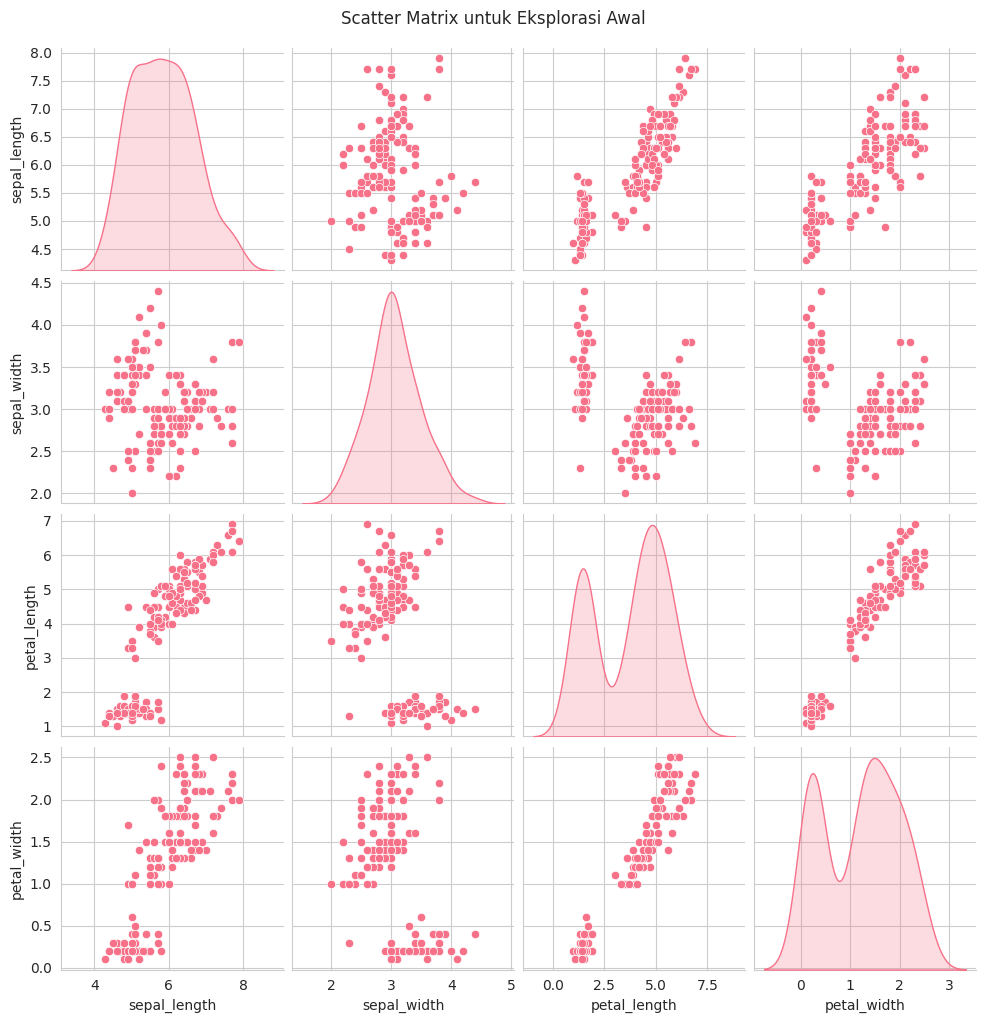

In [94]:
print("\n--- Deskripsi Statistik ---")
display(df.describe().round(2))

# Visualisasi matriks scatter menggunakan seaborn
sns.set_style("whitegrid")
pairplot = sns.pairplot(df.drop(["species", "species_name"], axis=1), diag_kind="kde")
pairplot.fig.suptitle("Scatter Matrix untuk Eksplorasi Awal", y=1.02)
plt.show()

### 5. Analisis Distribusi Data

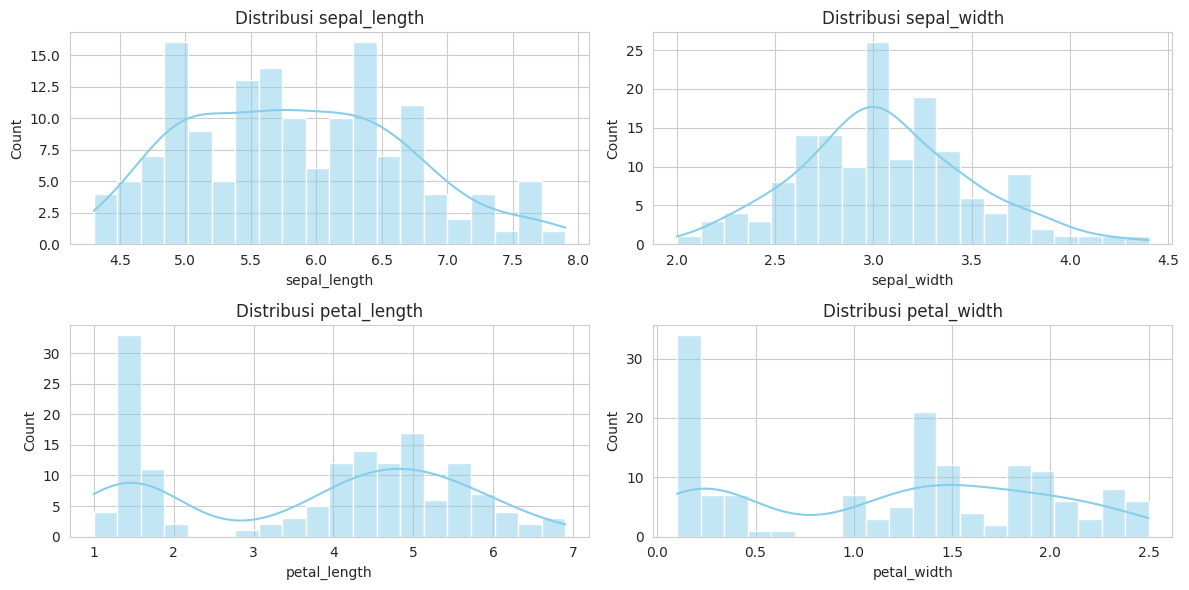

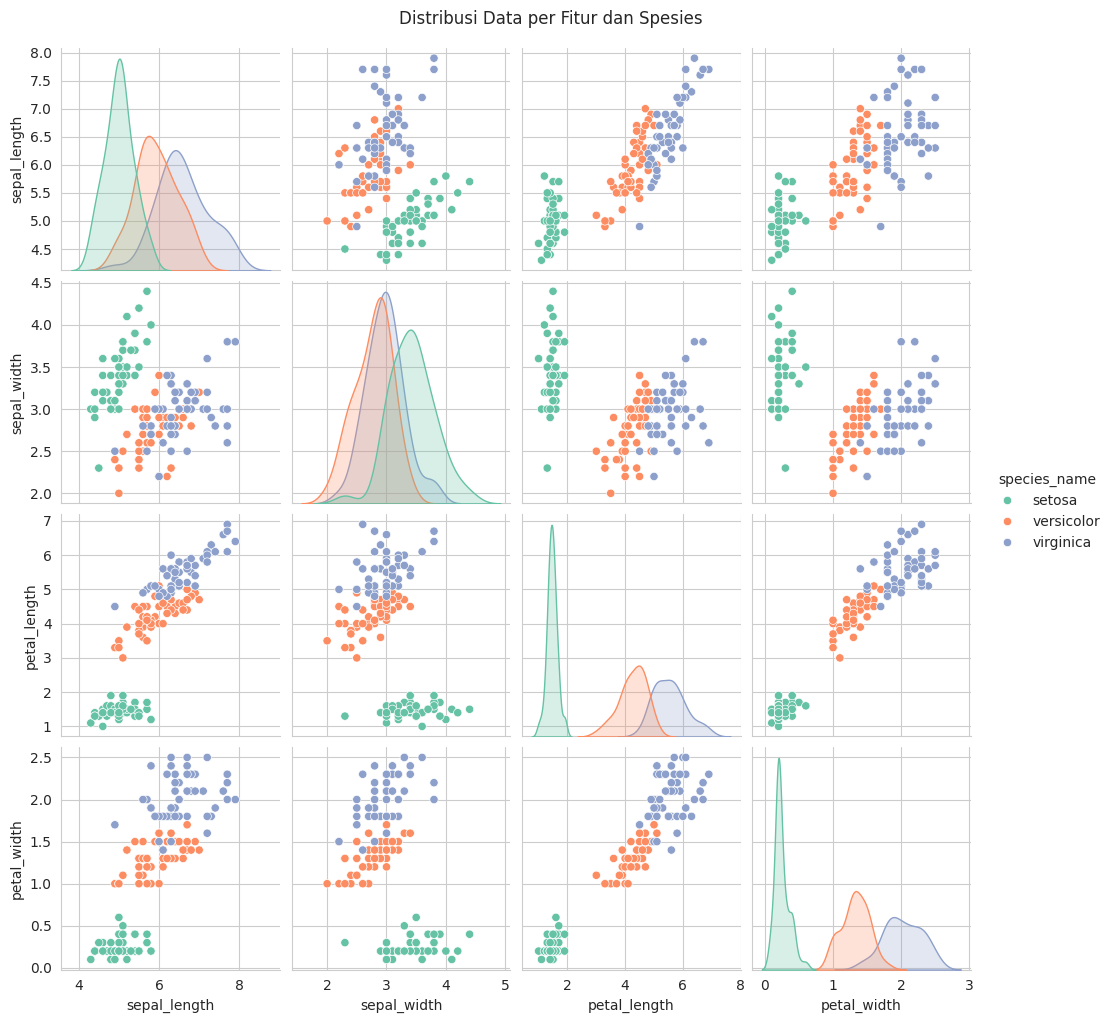

In [95]:
plt.figure(figsize=(12,6))
num_cols = df.columns[:-2]  # Hanya fitur numerik
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

# Pairplot untuk melihat sebaran per spesies
pairplot_fig = sns.pairplot(df, hue="species_name", palette="Set2")
pairplot_fig.fig.suptitle("Distribusi Data per Fitur dan Spesies", y=1.02)
plt.show()

### 6. Analisis Korelasi Antar Fitur


--- Matriks Korelasi ---
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


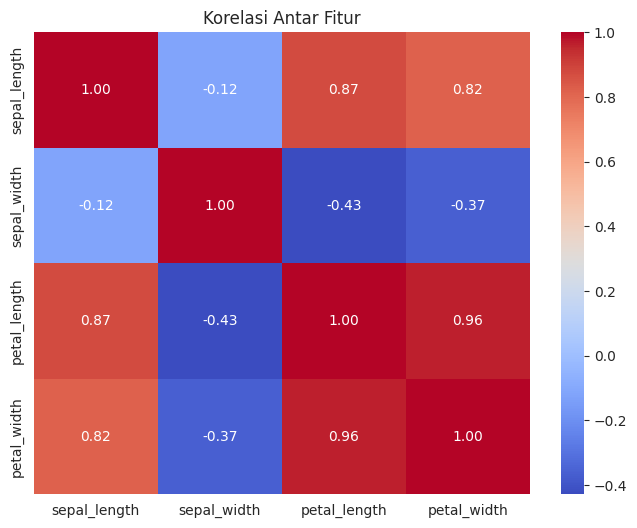

In [96]:
# Hitung matriks korelasi (hanya kolom numerik)
corr_matrix = df.select_dtypes(include=[np.number]).corr()
print("\n--- Matriks Korelasi ---")
print(corr_matrix)

# Heatmap visualisasi korelasi
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()


### 7. Analisis per Spesies

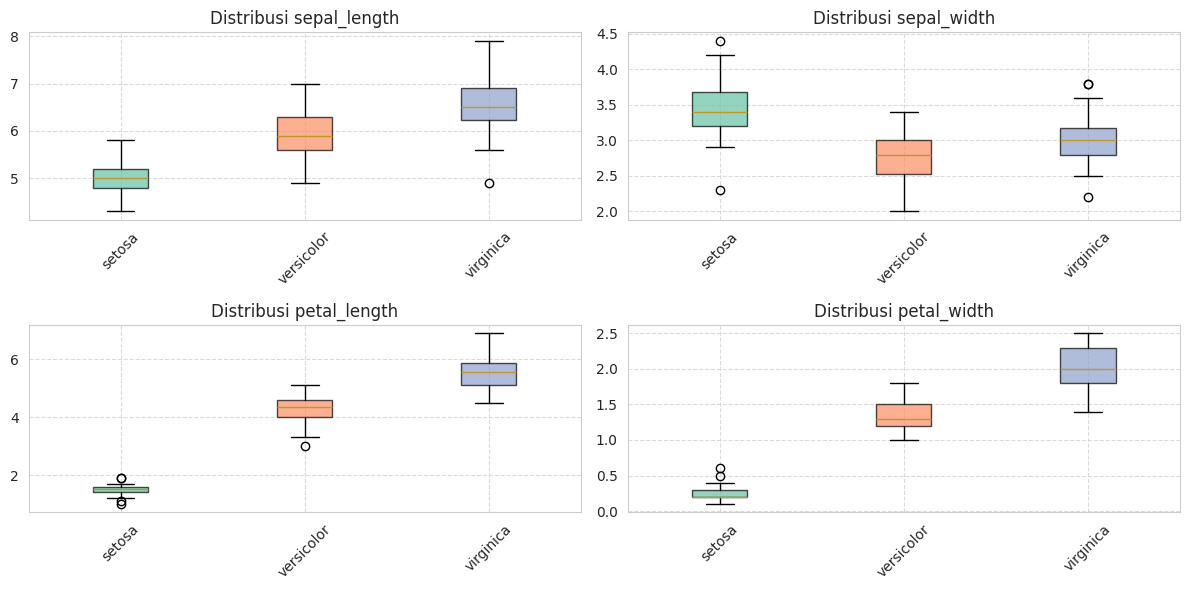

In [97]:
# 7. Analisis per Spesies
# =============================================
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
feature_cols = df.columns[:4]  # First 4 numeric columns

# Flatten axes for easier iteration
axes = axes.flatten()

# Define colors for each species
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # Set2 color palette

for i, (ax, col) in enumerate(zip(axes, feature_cols)):
    # Get data for each species
    data = [df[df['species_name'] == species][col].values 
            for species in df['species_name'].unique()]
    
    # Create boxplot
    bp = ax.boxplot(data, patch_artist=True)
    
    # Set colors
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Customize plot
    ax.set_title(f'Distribusi {col}')
    ax.set_xticklabels(df['species_name'].unique(), rotation=45)
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 8. Deteksi Outlier

In [98]:
num_cols = df.select_dtypes(include="number").columns

# Hitung IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Deteksi outlier
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | 
            (df[num_cols] > (Q3 + 1.5 * IQR)))

print("\n--- Jumlah Outlier per Kolom ---")
print(outliers.sum())

print("\n--- Persentase Outlier per Kolom ---")
print((outliers.sum() / len(df) * 100).round(2).astype(str) + " %")



--- Jumlah Outlier per Kolom ---
sepal_length    0
sepal_width     4
petal_length    0
petal_width     0
dtype: int64

--- Persentase Outlier per Kolom ---
sepal_length     0.0 %
sepal_width     2.67 %
petal_length     0.0 %
petal_width      0.0 %
dtype: object


In [99]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_data = df[(df[col] < lower) | (df[col] > upper)][[col, "species"]]
    
    print(f"\nOutlier pada {col}:")
    if not outlier_data.empty:
        print(outlier_data)
    else:
        print("Tidak ada outlier")



Outlier pada sepal_length:
Tidak ada outlier

Outlier pada sepal_width:
    sepal_width     species
15          4.4      setosa
32          4.1      setosa
33          4.2      setosa
60          2.0  versicolor

Outlier pada petal_length:
Tidak ada outlier

Outlier pada petal_width:
Tidak ada outlier


### 8.1 Deteksi Outlier dengan Model ABOD, KNN, COF


=== Deteksi Outlier dengan LOF ===
Jumlah outlier: 15

=== Deteksi Outlier dengan Isolation Forest ===


Jumlah outlier: 15

=== Deteksi Outlier dengan Robust Covariance ===
Jumlah outlier: 15


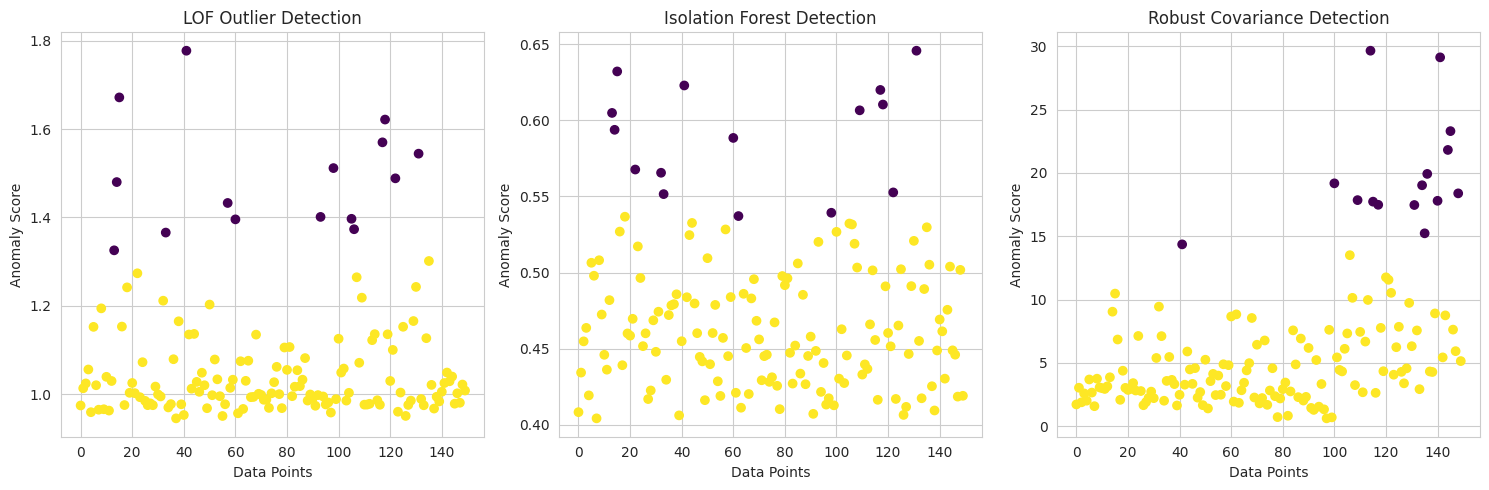

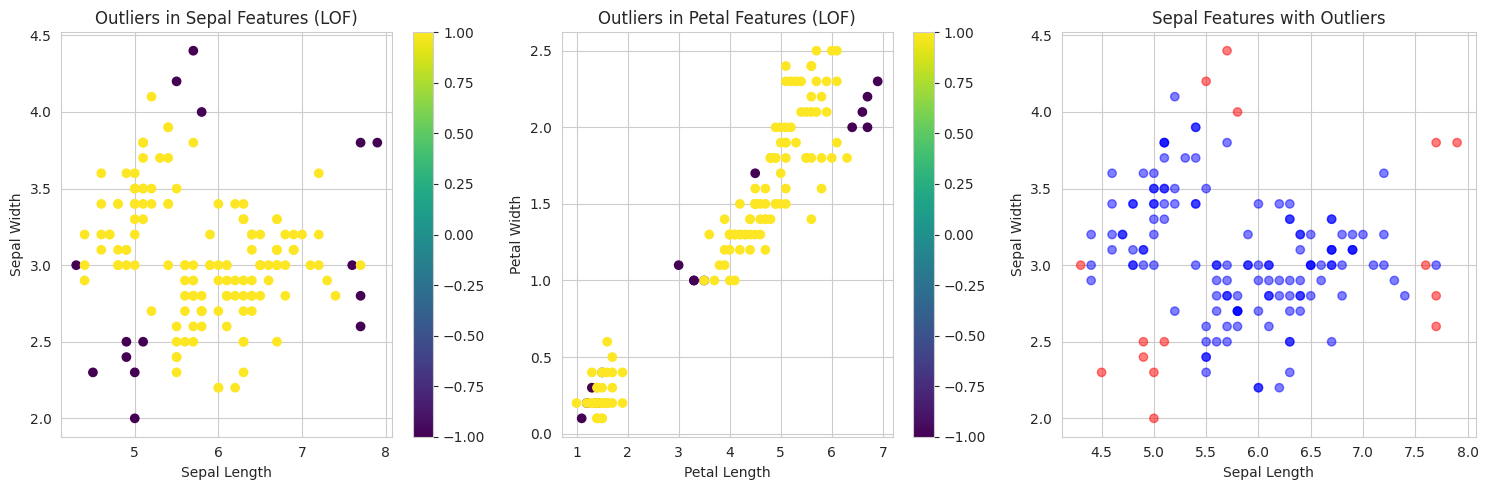

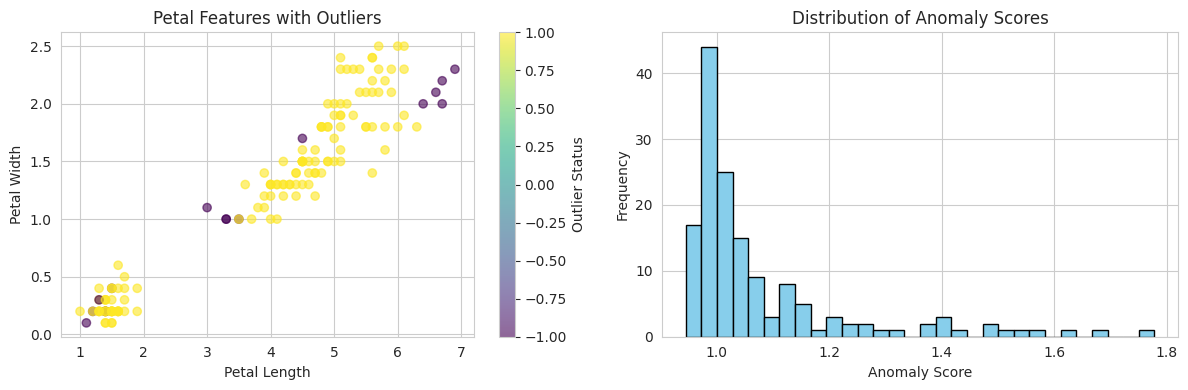


=== Perbandingan Hasil Deteksi Outlier ===

Jumlah outlier yang terdeteksi oleh masing-masing model:
LOF                  15
Isolation Forest     15
Robust Covariance    15
dtype: int64

Jumlah data yang terdeteksi sebagai outlier oleh semua model:
3

Jumlah data yang terdeteksi sebagai outlier oleh minimal 2 model:
12

Data points detected as outliers by all methods:
     sepal_length  sepal_width  petal_length  petal_width    species  \
41            4.5          2.3           1.3          0.3     setosa   
117           7.7          3.8           6.7          2.2  virginica   
131           7.9          3.8           6.4          2.0  virginica   

    species_name  
41        setosa  
117    virginica  
131    virginica  


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

# Prepare data
X = df.drop(['species','species_name'], axis=1).values

# === Local Outlier Factor (LOF) ===
print("\n=== Deteksi Outlier dengan LOF ===")
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_labels = lof.fit_predict(X)  # -1 untuk outlier, 1 untuk inlier
lof_scores = -lof.negative_outlier_factor_
print("Jumlah outlier:", sum(lof_labels == -1))

# === Isolation Forest ===
print("\n=== Deteksi Outlier dengan Isolation Forest ===")
iso = IsolationForest(contamination=0.1, random_state=42)
iso_labels = iso.fit_predict(X)
iso_scores = -iso.score_samples(X)
print("Jumlah outlier:", sum(iso_labels == -1))

# === Robust Covariance ===
print("\n=== Deteksi Outlier dengan Robust Covariance ===")
ee = EllipticEnvelope(contamination=0.1, random_state=42)
ee_labels = ee.fit_predict(X)
ee_scores = -ee.score_samples(X)
print("Jumlah outlier:", sum(ee_labels == -1))

# === Visualisasi Scores ===
plt.figure(figsize=(15, 5))

# Plot LOF
plt.subplot(131)
plt.scatter(range(len(lof_scores)), lof_scores, c=lof_labels, cmap='viridis')
plt.title('LOF Outlier Detection')
plt.ylabel('Anomaly Score')
plt.xlabel('Data Points')

# Plot Isolation Forest
plt.subplot(132)
plt.scatter(range(len(iso_scores)), iso_scores, c=iso_labels, cmap='viridis')
plt.title('Isolation Forest Detection')
plt.ylabel('Anomaly Score')
plt.xlabel('Data Points')

# Plot Robust Covariance
plt.subplot(133)
plt.scatter(range(len(ee_scores)), ee_scores, c=ee_labels, cmap='viridis')
plt.title('Robust Covariance Detection')
plt.ylabel('Anomaly Score')
plt.xlabel('Data Points')

plt.tight_layout()
plt.show()

# === Visualisasi dalam Feature Space ===
plt.figure(figsize=(15, 5))

# Plot untuk sepal features (using LOF results)
plt.subplot(131)
sc = plt.scatter(df['sepal_length'], df['sepal_width'], 
           c=lof_labels, cmap='viridis')
plt.title('Outliers in Sepal Features (LOF)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(sc)

# Plot untuk petal features
plt.subplot(132)
sc = plt.scatter(df['petal_length'], df['petal_width'], 
           c=lof_labels, cmap='viridis')
plt.title('Outliers in Petal Features (LOF)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(sc)

# Plot untuk scatter matrix of features
plt.subplot(133)
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
outlier_colors = np.where(lof_labels == -1, 'red', 'blue')
plt.scatter(X[:, 0], X[:, 1], c=outlier_colors, alpha=0.5)
plt.title('Sepal Features with Outliers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.tight_layout()
plt.show()

# === Additional Visualization ===
plt.figure(figsize=(12, 4))

# Plot scatter matrix for petal features
plt.subplot(121)
plt.scatter(df['petal_length'], df['petal_width'], 
           c=lof_labels, cmap='viridis', alpha=0.6)
plt.title('Petal Features with Outliers')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(label='Outlier Status')

# Plot histogram of anomaly scores
plt.subplot(122)
plt.hist(lof_scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# === Perbandingan Hasil ===
comparison_df = pd.DataFrame({
    'LOF': lof_labels == -1,
    'Isolation Forest': iso_labels == -1,
    'Robust Covariance': ee_labels == -1
})

print("\n=== Perbandingan Hasil Deteksi Outlier ===")
print("\nJumlah outlier yang terdeteksi oleh masing-masing model:")
print(comparison_df.sum())

print("\nJumlah data yang terdeteksi sebagai outlier oleh semua model:")
print(comparison_df.all(axis=1).sum())

print("\nJumlah data yang terdeteksi sebagai outlier oleh minimal 2 model:")
print((comparison_df.sum(axis=1) >= 2).sum())

# Print details of points detected as outliers by all methods
all_outliers = comparison_df.all(axis=1)
if all_outliers.any():
    print("\nData points detected as outliers by all methods:")
    outlier_details = df[all_outliers]
    print(outlier_details)

### 9. Kesimpulan

In [101]:
print("""
====================================================
Kesimpulan Data Understanding IRIS
====================================================
1. Dataset terdiri dari 150 baris data dan 5 kolom (4 numerik, 1 kategorikal).
2. Tidak ada missing value pada dataset.
3. Sepal length dan petal length menunjukkan korelasi yang cukup tinggi (~0.87).
4. Distribusi fitur berbeda cukup signifikan antar spesies:
   - Setosa punya petal kecil (pendek & sempit).
   - Versicolor berada di tengah.
   - Virginica punya petal lebih panjang & lebar.
5. Ditemukan beberapa outlier pada sepal width.
6. Secara umum dataset bersih, terstruktur, dan siap dipakai untuk analisis lebih lanjut (klasifikasi).
====================================================
""")


Kesimpulan Data Understanding IRIS
1. Dataset terdiri dari 150 baris data dan 5 kolom (4 numerik, 1 kategorikal).
2. Tidak ada missing value pada dataset.
3. Sepal length dan petal length menunjukkan korelasi yang cukup tinggi (~0.87).
4. Distribusi fitur berbeda cukup signifikan antar spesies:
   - Setosa punya petal kecil (pendek & sempit).
   - Versicolor berada di tengah.
   - Virginica punya petal lebih panjang & lebar.
5. Ditemukan beberapa outlier pada sepal width.
6. Secara umum dataset bersih, terstruktur, dan siap dipakai untuk analisis lebih lanjut (klasifikasi).

